# Environment setup

In [1]:
from google.colab import drive

drive.mount("/drive")
%cd ../drive/MyDrive/"Inpleo Assessment"

Mounted at /drive
/drive/MyDrive/Inpleo Assessment


In [43]:
import json
import pandas as po
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
from scipy.stats import ttest_ind

from agg import * # my custom functions


data = po.read_csv("data/Cleaned_airports.csv", index_col=0, parse_dates=['Time.Label'], infer_datetime_format=True)
data

,Airport.Code,Airport.Location,Airport.Name,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Total,Statistics.# of Delays.Weather,Statistics.Carriers.Names,...,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather,Time.Label,Time.Month,Time.Month Name,Time.Year,Time.Season
0,ATL,"Atlanta, GA",Hartsfield-Jackson Atlanta International,1009,1275,3217,17,5846,328,"American Airlines Inc.,JetBlue Airways,Contine...",...,68335,118831,518,268764,19474,2003-06-01,6,June,2003,Summer
1,TPA,"Tampa, FL",Tampa International,226,327,524,3,1122,42,"American Airlines Inc.,JetBlue Airways,Contine...",...,18558,19078,112,51364,2604,2003-06-01,6,June,2003,Summer
2,SLC,"Salt Lake City, UT",Salt Lake City International,363,290,352,15,1056,36,"American Airlines Inc.,JetBlue Airways,Contine...",...,13883,10512,556,42863,1685,2003-06-01,6,June,2003,Summer
3,SFO,"San Francisco, CA",San Francisco International,416,312,1080,14,1881,59,"American Airlines Inc.,Alaska Airlines Inc.,Co...",...,17879,45407,1138,90487,3390,2003-06-01,6,June,2003,Summer
4,SEA,"Seattle, WA",Seattle/Tacoma International,448,552,454,28,1518,36,"American Airlines Inc.,Alaska Airlines Inc.,Je...",...,28119,13860,1097,68673,2950,2003-06-01,6,June,2003,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3409,BOS,"Boston, MA",Logan International,515,756,775,3,2092,43,"Pinnacle Airlines Inc.,American Airlines Inc.,...",...,56771,38108,118,127224,2968,2013-03-01,3,March,2013,Spring
3410,ATL,"Atlanta, GA",Hartsfield-Jackson Atlanta International,1182,2139,1990,3,5479,165,"Pinnacle Airlines Inc.,American Airlines Inc.,...",...,133049,87848,198,337684,18555,2013-03-01,3,March,2013,Spring
3411,MSP,"Minneapolis, MN",Minneapolis-St Paul International,452,665,876,2,2074,79,"Pinnacle Airlines Inc.,American Airlines Inc.,...",...,40715,38518,64,120223,7347,2013-03-01,3,March,2013,Spring
3412,FLL,"Fort Lauderdale, FL",Fort Lauderdale-Hollywood International,473,497,858,8,1888,52,"American Airlines Inc.,Alaska Airlines Inc.,Je...",...,34420,34436,194,100443,3825,2013-03-01,3,March,2013,Spring


# **Metrics**
1. Chance of Delay
  * _How likely is it that my flight will be delayed?_
2. Average Length of Delay
  * _Given my flight is delayed, how long will I have to wait?_
  * "The Federal Aviation Administration (FAA) considers a flight to be delayed when it is 15 minutes later than its scheduled time."
3. Ratio of On-Time to Cancelled
  * _How many on-time flights for each cancelled flight?_

## For each airport

In [99]:
chances_delay = {} # chance of having a delay
avg_lengths_delay = {} # given a delay, how long to wait?
ratios_ontime_cancelled = {} # for every x on time flights, there is 1 cancelled flight. "OT-C Ratio"

for airport_name in data['Airport.Name'].unique():
    subset = data[data['Airport.Name'] == airport_name]
    
    chance = subset['Statistics.Flights.Delayed'].sum() / subset['Statistics.Flights.Total'].sum()
    chances_delay[airport_name] = chance

    avg_len_delay = subset['Statistics.Minutes Delayed.Total'].sum() / subset['Statistics.Flights.Delayed'].sum()
    avg_lengths_delay[airport_name] = avg_len_delay

    ratio_ontime_cancel = subset['Statistics.Flights.Total'].sum() / subset['Statistics.Flights.Cancelled'].sum()
    ratios_ontime_cancelled[airport_name] = ratio_ontime_cancel

In [100]:
metrics_data = (po.DataFrame([po.Series(chances_delay), 
               po.Series(avg_lengths_delay), 
               po.Series(ratios_ontime_cancelled)]).T
 .rename(columns={0:"Chance of Delay", 1:"Average Length of Delay", 2:"OT-C Ratio"})
)
metrics_data.sort_values("Chance of Delay")

,Chance of Delay,Average Length of Delay,OT-C Ratio
Salt Lake City International,0.150310,47.352034,95.074114
Phoenix Sky Harbor International,0.163098,47.038159,91.381491
Chicago Midway International,0.173389,51.214150,87.478954
Denver International,0.175961,51.657683,76.203688
Dallas/Fort Worth International,0.177066,57.716314,47.910861
Baltimore/Washington International Thurgood Marshall,0.179197,52.746797,79.757578
George Bush Intercontinental/Houston,0.179234,54.181979,85.272740
Charlotte Douglas International,0.183684,47.946867,65.864828
Detroit Metro Wayne County,0.185233,54.234841,55.402618
Portland International,0.185555,48.584307,117.796844


In [98]:
metrics_data.corr()

,Chance of Delay,Average Length of Delay,OT-C Ratio
Chance of Delay,1.000000,0.967176,-0.537489
Average Length of Delay,0.967176,1.000000,-0.649464
OT-C Ratio,-0.537489,-0.649464,1.000000


## For certain types of delays
Emphasize Metrics 1 and 2

In [77]:
data['Statistics.Minutes Delayed.Total Minus Carrier'] = data['Statistics.Minutes Delayed.Total'] - data['Statistics.Minutes Delayed.Carrier']
data['Statistics.Flights.Delayed Minus Carrier'] = data['Statistics.Flights.Delayed'] - data['Statistics.# of Delays.Carrier']
data['Statistics.Flights.Total Minus Carrier'] = data['Statistics.Flights.Total'] - data['Statistics.# of Delays.Carrier']
# ...Assuming 1 delay <-> 1 flight (previous analysis showed this is not necessarily true, there's about a .1% difference, considered negligible)

In [78]:
chances_delay = {} # chance of having a delay
avg_lengths_delay = {} # given a delay, how long to wait?
ratios_ontime_cancelled = {} # for every x on time flights, there is 1 cancelled flight. "OT-C Ratio"

for airport_name in data['Airport.Name'].unique():
    subset = data[data['Airport.Name'] == airport_name]
    
    # Metric 1.
    chance = subset['Statistics.Flights.Delayed Minus Carrier'].sum() / subset['Statistics.Flights.Total Minus Carrier'].sum()
    chances_delay[airport_name] = chance

    # Metric 2.
    avg_len_delay = subset['Statistics.Minutes Delayed.Total Minus Carrier'].sum() / subset['Statistics.Flights.Delayed Minus Carrier'].sum()
    avg_lengths_delay[airport_name] = avg_len_delay

    # Metric 3.
    ratio_ontime_cancel = subset['Statistics.Flights.Total Minus Carrier'].sum() / subset['Statistics.Flights.Cancelled'].sum()
    ratios_ontime_cancelled[airport_name] = ratio_ontime_cancel

In [79]:
metrics_data_no_carrier_delay = (po.DataFrame([po.Series(chances_delay), 
               po.Series(avg_lengths_delay), 
               po.Series(ratios_ontime_cancelled)]).T
 .rename(columns={0:"Chance of Delay", 1:"Average Length of Delay", 2:"OT-C Ratio"})
)

display(metrics_data_no_carrier_delay.sort_values("Chance of Delay"))


,Chance of Delay,Average Length of Delay,OT-C Ratio
Salt Lake City International,0.106675,46.357458,90.430140
Phoenix Sky Harbor International,0.120486,44.515602,86.954101
Denver International,0.133857,50.614217,72.499289
San Diego International,0.134022,46.142268,94.436650
Portland International,0.135491,48.163693,110.975236
Los Angeles International,0.139797,47.539633,76.152645
Chicago Midway International,0.140109,52.563922,84.093295
Baltimore/Washington International Thurgood Marshall,0.140375,53.886934,76.155583
Charlotte Douglas International,0.141220,46.221748,62.607973
Minneapolis-St Paul International,0.142290,48.684783,62.668476


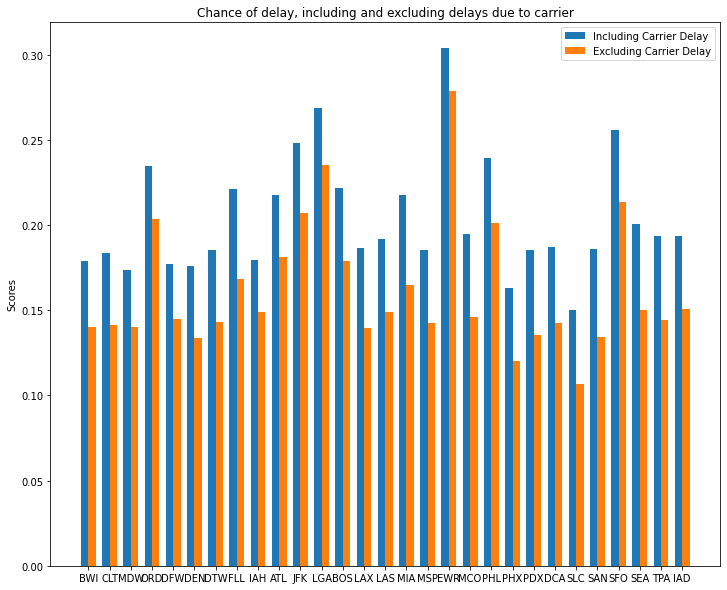

In [92]:
ind = np.arange(metrics_data_no_carrier_delay.shape[0])  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 10))
rects1 = ax.bar(ind - width/2, metrics_data['Chance of Delay'].sort_index(), width, label='Including Carrier Delay')
rects2 = ax.bar(ind + width/2, metrics_data_no_carrier_delay['Chance of Delay'].sort_index(), width,
                label='Excluding Carrier Delay')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Chance of delay, including and excluding delays due to carrier')
ax.set_xticks(ind)

matching_airport_code = [data.loc[data['Airport.Name'] == name,'Airport.Code'].iloc[0] for name in metrics_data.sort_index().index]
ax.set_xticklabels(matching_airport_code)
ax.legend();

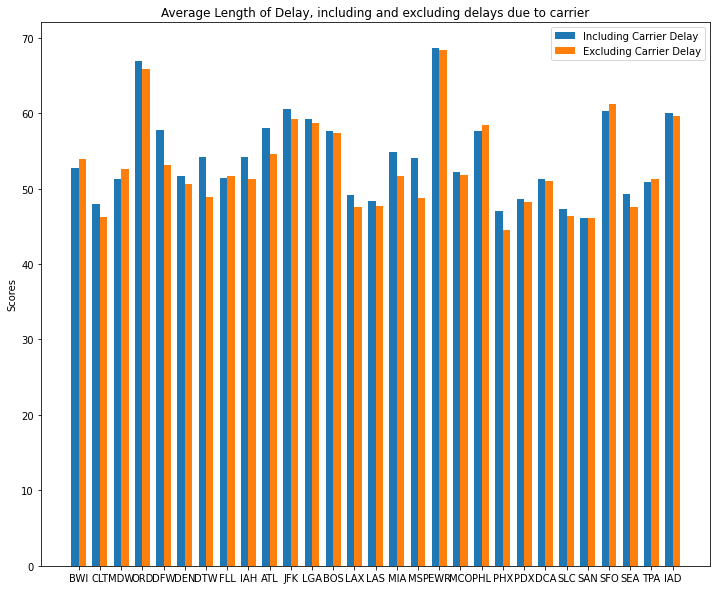

In [101]:
ind = np.arange(metrics_data_no_carrier_delay.shape[0])  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 10))
rects1 = ax.bar(ind - width/2, metrics_data['Average Length of Delay'].sort_index(), width, label='Including Carrier Delay')
rects2 = ax.bar(ind + width/2, metrics_data_no_carrier_delay['Average Length of Delay'].sort_index(), width,
                label='Excluding Carrier Delay')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Average Length of Delay, including and excluding delays due to carrier')
ax.set_xticks(ind)

matching_airport_code = [data.loc[data['Airport.Name'] == name,'Airport.Code'].iloc[0] for name in metrics_data.sort_index().index]
ax.set_xticklabels(matching_airport_code)
ax.legend();

Carrier delay makes up a large amount of the delays, but only a tiny amount of actual number of minutes delayed.

## By the time of year (month; season)
Particularly nasty weather can hit the East coast of the US during the winter season. How can this affect our perceptions and understanding of the results we've seen so far?

In [58]:
# First, let's convince ourselves that the month/season does have an impact on our metrics

chances_delay = {} # chance of having a delay
avg_lengths_delay = {} # given a delay, how long to wait?
ratios_ontime_cancelled = {} # for every x on time flights, there is 1 cancelled flight. "OT-C Ratio"

for month in data['Time.Month'].unique():
    subset = data[data['Time.Month'] == month]
    
    # Metric 1.
    chance = subset['Statistics.Flights.Delayed'].sum() / subset['Statistics.Flights.Total'].sum()
    chances_delay[month] = chance

    # Metric 2.
    avg_len_delay = subset['Statistics.Minutes Delayed.Total'].sum() / subset['Statistics.Flights.Delayed'].sum()
    avg_lengths_delay[month] = avg_len_delay

    # Metric 3.
    ratio_ontime_cancel = subset['Statistics.Flights.Total'].sum() / subset['Statistics.Flights.Cancelled'].sum()
    ratios_ontime_cancelled[month] = ratio_ontime_cancel

,Chance of Delay,Average Length of Delay,OT-C Ratio
1,0.209711,54.577705,37.637696
2,0.210889,54.312259,33.411436
3,0.207544,55.654365,56.217885
4,0.184897,53.964912,73.731400
5,0.193446,55.402770,79.878420
6,0.233695,59.746407,59.457055
7,0.228798,61.351641,57.749043
8,0.206273,58.089651,58.028024
9,0.155422,52.749875,66.314159
10,0.178794,51.664197,71.344231


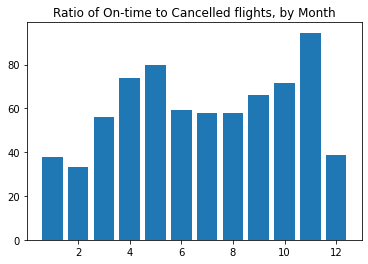

In [69]:
metrics_data_by_month = (po.DataFrame([po.Series(chances_delay), 
               po.Series(avg_lengths_delay), 
               po.Series(ratios_ontime_cancelled)]).T
 .rename(columns={0:"Chance of Delay", 1:"Average Length of Delay", 2:"OT-C Ratio"})
)
display(metrics_data_by_month.sort_index())
plt.bar(metrics_data_by_month.index, metrics_data_by_month['OT-C Ratio'])
plt.title("Ratio of On-time to Cancelled flights, by Month");

In [125]:
# Metric 1
z = data.groupby(['Airport.Name', 'Time.Season']).sum()['Statistics.Flights.Delayed'] / data.groupby(['Airport.Name', 'Time.Season']).sum()['Statistics.Flights.Total']
z_df = po.DataFrame(z)
display(z_df.loc['Salt Lake City International'],
        z_df.loc['LaGuardia'],
        z_df.loc['Los Angeles International'])

,0
Time.Season,
Fall,0.117710
Spring,0.127513
Summer,0.144806
Winter,0.211288


,0
Time.Season,
Fall,0.242230
Spring,0.281790
Summer,0.278815
Winter,0.270998


,0
Time.Season,
Fall,0.163120
Spring,0.174976
Summer,0.195145
Winter,0.213314


In [126]:
# Metric 2
z = data.groupby(['Airport.Name', 'Time.Season']).sum()['Statistics.Minutes Delayed.Total'] / data.groupby(['Airport.Name', 'Time.Season']).sum()['Statistics.Flights.Delayed']
z_df = po.DataFrame(z)
display(z_df.loc['Salt Lake City International'],
        z_df.loc['LaGuardia'],
        z_df.loc['Los Angeles International'])

,0
Time.Season,
Fall,43.750787
Spring,45.317807
Summer,47.587992
Winter,50.376188


,0
Time.Season,
Fall,54.268820
Spring,57.649230
Summer,66.405263
Winter,57.278285


,0
Time.Season,
Fall,45.982891
Spring,47.445433
Summer,52.207619
Winter,49.710620


In [127]:
# Metric 3
z = data.groupby(['Airport.Name', 'Time.Season']).sum()['Statistics.Flights.Total'] / data.groupby(['Airport.Name', 'Time.Season']).sum()['Statistics.Flights.Cancelled']
z_df = po.DataFrame(z)
display(z_df.loc['Salt Lake City International'],
        z_df.loc['LaGuardia'],
        z_df.loc['Los Angeles International'])

,0
Time.Season,
Fall,128.106762
Spring,116.841823
Summer,149.129368
Winter,51.508622


,0
Time.Season,
Fall,33.964564
Spring,31.703930
Summer,21.458266
Winter,18.087043


,0
Time.Season,
Fall,83.546524
Spring,93.829686
Summer,99.230084
Winter,58.351656


Season/month most impacts metric 3, the number of cancelled flights.

But is it really due to the bad weather?

## By location (state; city; latitude/longitude)

In [ ]:
# See dashboard

# Sources
* https://aspm.faa.gov/aspmhelp/index/Types_of_Delay.html
* https://en.wikipedia.org/wiki/Flight_cancellation_and_delay#:~:text=The%20Federal%20Aviation%20Administration

# Data shortcomings
* Given total flights, but not more granular info on how full those flights are. Intuitively, LaGuardia may have more full flights than Salt Lake City - and with more people, more trouble, more opportunities for delay
  * Could be somewhat inferred from an external dataset on population (density) around a given airport

# Next steps
* Appropriately weighing delayed vs. cancelled flights to make a decision
* Improved dashboard for further tailored, on-demand, client-side decision making